In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
url_test = 'https://drive.google.com/uc?id={}'.format("1Z83DgrqBtVEwiQ1VOMQ25ZkHMcrcMDcq")
url_train = 'https://drive.google.com/uc?id={}'.format("1dq4LKK9FgHPif4ksfo1cgQI5VpAFczDv")

df_test = pd.read_csv(url_test)
df_train = pd.read_csv(url_train)

In [3]:
df_test.shape

(418, 11)

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check Missing Value

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Age, Carbin, Embark (only train) have Missing Value


# Missing values in Embark replace with "S" which is mode because there is lots of "S"

In [8]:
df_train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [9]:
df_train['Embarked'].fillna('S', inplace = True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_train.corr()

<ipython-input-10-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
df_train[['Pclass', 'Sex' , 'Age']].groupby(["Pclass", "Sex"]).mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

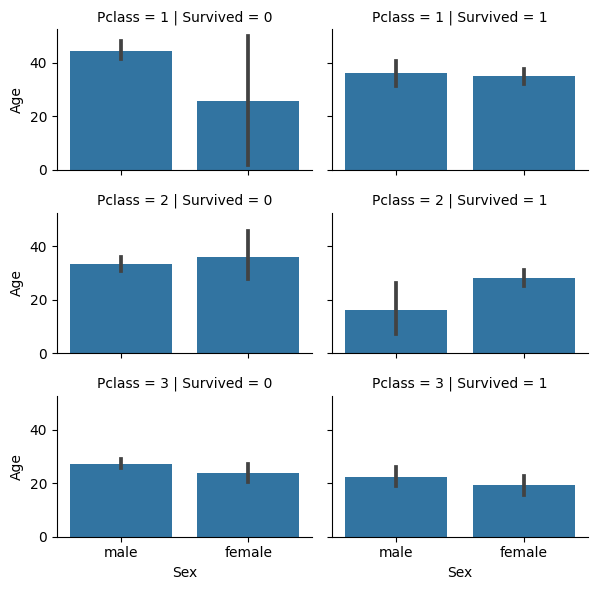

In [12]:
grid = sns.FacetGrid(df_train, row='Pclass', col='Survived', height=2, aspect=1.5)

grid.map(sns.barplot, 'Sex','Age', order=["male","female"])

grid.add_legend()

## Fill Nan value with mean value each Pclass and Sex for Train set

In [13]:
# pclass 1
df_train['Age'] = df_train.apply(
    lambda row: 34 if pd.isnull(row['Age']) and row['Pclass'] == 1 and row['Sex'] == 'female' else row['Age'], axis=1
)

df_train['Age'] = df_train.apply(
    lambda row: 41 if pd.isnull(row['Age']) and row['Pclass'] == 1 and row['Sex'] == 'male' else row['Age'], axis=1
)

# pclass 2
df_train['Age'] = df_train.apply(
    lambda row: 28 if pd.isnull(row['Age']) and row['Pclass'] == 2 and row['Sex'] == 'female' else row['Age'], axis=1
)

df_train['Age'] = df_train.apply(
    lambda row: 30 if pd.isnull(row['Age']) and row['Pclass'] == 2 and row['Sex'] == 'male' else row['Age'], axis=1
)

# pclass 3
df_train['Age'] = df_train.apply(
    lambda row: 21 if pd.isnull(row['Age']) and row['Pclass'] == 3 and row['Sex'] == 'female' else row['Age'], axis=1
)

df_train['Age'] = df_train.apply(
    lambda row: 26 if pd.isnull(row['Age']) and row['Pclass'] == 3 and row['Sex'] == 'male' else row['Age'], axis=1
)

## Fill Nan value with mean value each Pclass and Sex for Test set

In [14]:
# pclass 1
df_test['Age'] = df_test.apply(
    lambda row: 34 if pd.isnull(row['Age']) and row['Pclass'] == 1 and row['Sex'] == 'female' else row['Age'], axis=1
)

df_test['Age'] = df_test.apply(
    lambda row: 41 if pd.isnull(row['Age']) and row['Pclass'] == 1 and row['Sex'] == 'male' else row['Age'], axis=1
)

# pclass 2
df_test['Age'] = df_test.apply(
    lambda row: 28 if pd.isnull(row['Age']) and row['Pclass'] == 2 and row['Sex'] == 'female' else row['Age'], axis=1
)

df_test['Age'] = df_test.apply(
    lambda row: 30 if pd.isnull(row['Age']) and row['Pclass'] == 2 and row['Sex'] == 'male' else row['Age'], axis=1
)

# pclass 3
df_test['Age'] = df_test.apply(
    lambda row: 21 if pd.isnull(row['Age']) and row['Pclass'] == 3 and row['Sex'] == 'female' else row['Age'], axis=1
)

df_test['Age'] = df_test.apply(
    lambda row: 26 if pd.isnull(row['Age']) and row['Pclass'] == 3 and row['Sex'] == 'male' else row['Age'], axis=1
)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [17]:
df_test['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

# Cabin has a lot of Missing values so I don't use that
# Also, ticket column is not useful



In [18]:
df_train = df_train.drop(['Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)

# Male: 0, Female: 1

In [19]:
# Train
df_train['Sex'] = df_train['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df_train['Sex']

# Test
df_test['Sex'] = df_test['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df_test['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

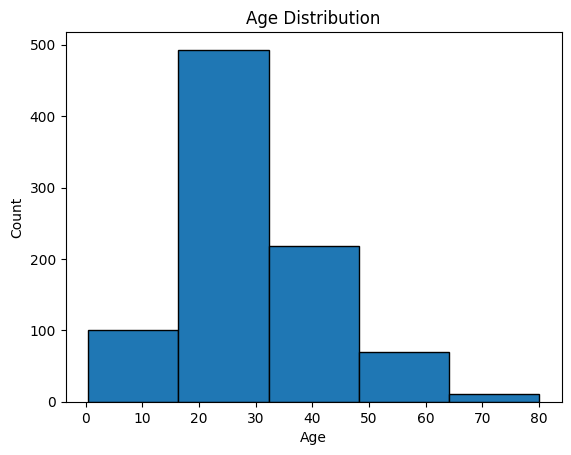

In [20]:
n, bins, patches = plt.hist(df_train['Age'], bins=5, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [21]:
df_train['Age_range'] = pd.cut(df_train['Age'], 5)
df_train[['Age_range', 'Survived']].groupby(['Age_range']).mean().sort_values(by='Age_range', ascending=True)

,Survived
Age_range,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.336714
"(32.252, 48.168]",0.412844
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


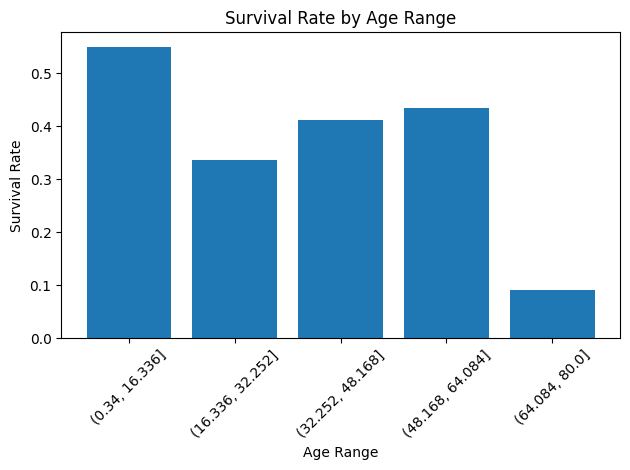

In [22]:
age_survival_mean = df_train.groupby('Age_range')['Survived'].mean()

plt.bar(age_survival_mean.index.astype(str), age_survival_mean.values)
plt.xlabel('Age Range')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Train
df_train['Age_class'] = pd.cut(df_train['Age'], bins=[0, 16, 32, 64, 80], labels=[0, 1, 2, 3], include_lowest=True)

# Test
df_test['Age_class'] = pd.cut(df_test['Age'], bins=[0, 16, 32, 64, 80], labels=[0, 1, 2, 3], include_lowest=True)


# Chnage Embarked values from string to integer

In [24]:
# Train
df_train['Embarked'] = df_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Test
df_test['Embarked'] = df_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Create new feature Family_size by using SibSp + Parch

In [25]:
df_train['family_size'] = df_train['SibSp'] + df_train['Parch']
df_test['family_size'] = df_test['SibSp'] + df_test['Parch']

In [26]:
df_train[['family_size','Survived']].groupby('family_size').mean()

,Survived
family_size,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


# Family_Class
# If someone is alone 1,
# otherwise 0

In [27]:
# Train
df_train['family_class'] = df_train['family_size'].apply(lambda x: 1 if x == 0 else 0)
df_train['family_class']

# Test
df_test['family_class'] = df_test['family_size'].apply(lambda x: 1 if x == 0 else 0)
df_test['family_class']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    1
415    1
416    1
417    0
Name: family_class, Length: 418, dtype: int64

In [28]:
df_train[['family_class', 'Survived']].groupby('family_class').mean()

,Survived
family_class,
0,0.505650
1,0.303538


In [29]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range,Age_class,family_size,family_class
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,"(16.336, 32.252]",1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,"(32.252, 48.168]",2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,"(16.336, 32.252]",1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,"(32.252, 48.168]",2,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,"(32.252, 48.168]",2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,0,"(16.336, 32.252]",1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,0,"(16.336, 32.252]",1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.0,1,2,23.4500,0,"(16.336, 32.252]",1,3,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,1,"(16.336, 32.252]",1,0,1


In [30]:
df_train['Fare'].value_counts().sort_index()

0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64

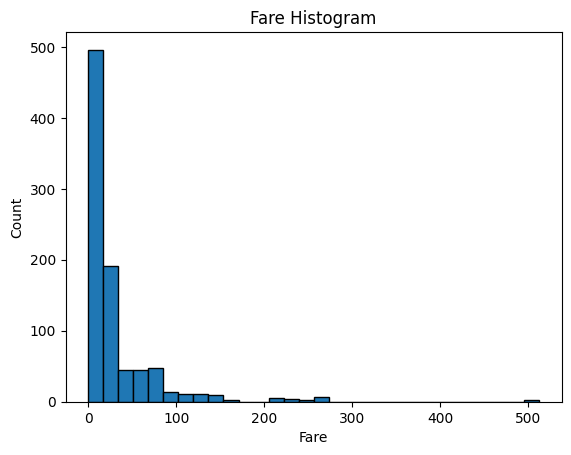

In [31]:
plt.hist(df_train['Fare'], bins=30, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Histogram')
plt.show()

In [32]:
df_train['Fare_range'] = pd.qcut(df_train['Fare'], 3)
df_train['Fare_range'].value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare_range, dtype: int64

In [33]:
df_train[['Fare_range', 'Survived']].groupby('Fare_range').mean()

,Survived
Fare_range,
"(-0.001, 8.662]",0.198052
"(8.662, 26.0]",0.402778
"(26.0, 512.329]",0.559322


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   Name          418 non-null    object  
 3   Sex           418 non-null    int64   
 4   Age           418 non-null    float64 
 5   SibSp         418 non-null    int64   
 6   Parch         418 non-null    int64   
 7   Fare          417 non-null    float64 
 8   Embarked      418 non-null    int64   
 9   Age_class     418 non-null    category
 10  family_size   418 non-null    int64   
 11  family_class  418 non-null    int64   
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 36.7+ KB


In [35]:
median_fare = df_test['Fare'].median()
df_test['Fare'].fillna(median_fare, inplace=True)

#There is one missing value on Fare column in Test set so we fill with median value

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   Name          418 non-null    object  
 3   Sex           418 non-null    int64   
 4   Age           418 non-null    float64 
 5   SibSp         418 non-null    int64   
 6   Parch         418 non-null    int64   
 7   Fare          418 non-null    float64 
 8   Embarked      418 non-null    int64   
 9   Age_class     418 non-null    category
 10  family_size   418 non-null    int64   
 11  family_class  418 non-null    int64   
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 36.7+ KB


In [37]:
# Train
df_train['Fare_class'] = pd.cut(df_train['Fare'], bins=[-0.001, 8.8662, 26.0, 512.3292], labels=[0, 1, 2], include_lowest=True)

# Test
df_test['Fare_class'] = pd.cut(df_test['Fare'], bins=[-0.001, 8.8662, 26.0, 512.3292], labels=[0, 1, 2], include_lowest=True)

In [38]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range,Age_class,family_size,family_class,Fare_range,Fare_class
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,"(16.336, 32.252]",1,1,0,"(-0.001, 8.662]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,"(32.252, 48.168]",2,1,0,"(26.0, 512.329]",2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,"(16.336, 32.252]",1,0,1,"(-0.001, 8.662]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,"(32.252, 48.168]",2,1,0,"(26.0, 512.329]",2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,"(32.252, 48.168]",2,0,1,"(-0.001, 8.662]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,0,"(16.336, 32.252]",1,0,1,"(8.662, 26.0]",1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,0,"(16.336, 32.252]",1,0,1,"(26.0, 512.329]",2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.0,1,2,23.4500,0,"(16.336, 32.252]",1,3,0,"(8.662, 26.0]",1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,1,"(16.336, 32.252]",1,0,1,"(26.0, 512.329]",2


In [39]:
X_train = df_train[['Survived', 'Pclass', 'Sex', 'Embarked', 'Age_class', 'family_class', 'Fare_class']]
X_train

X_test = df_test[[ 'Pclass', 'Sex', 'Embarked', 'Age_class', 'family_class', 'Fare_class']]
X_test

,Pclass,Sex,Embarked,Age_class,family_class,Fare_class
0,3,0,2,2,1,0
1,3,1,0,2,0,0
2,2,0,2,2,1,1
3,3,0,0,1,1,0
4,3,1,0,1,0,1
...,...,...,...,...,...,...
413,3,0,0,1,1,0
414,1,1,1,2,1,2
415,3,0,0,2,1,0
416,3,0,0,1,1,0


In [40]:
sc = StandardScaler()
X_train['Fare'] = sc.fit_transform(np.array(df_train['Fare']).reshape(-1, 1))
X_train

X_test['Fare'] = sc.fit_transform(np.array(df_test['Fare']).reshape(-1, 1))
X_test

<ipython-input-40-ffb7c2760b0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fare'] = sc.fit_transform(np.array(df_train['Fare']).reshape(-1, 1))
<ipython-input-40-ffb7c2760b0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare'] = sc.fit_transform(np.array(df_test['Fare']).reshape(-1, 1))


,Pclass,Sex,Embarked,Age_class,family_class,Fare_class,Fare
0,3,0,2,2,1,0,-0.497413
1,3,1,0,2,0,0,-0.512278
2,2,0,2,2,1,1,-0.464100
3,3,0,0,1,1,0,-0.482475
4,3,1,0,1,0,1,-0.417492
...,...,...,...,...,...,...,...
413,3,0,0,1,1,0,-0.493455
414,1,1,1,2,1,2,1.314435
415,3,0,0,2,1,0,-0.507796
416,3,0,0,1,1,0,-0.493455


In [41]:
one_hot_pclass = pd.get_dummies(df_train['Pclass'], prefix='Pclass')
one_hot_pclass

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [42]:
X_train = pd.concat([X_train, one_hot_pclass], axis=1)
X_train

,Survived,Pclass,Sex,Embarked,Age_class,family_class,Fare_class,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,3,0,0,1,0,0,-0.502445,0,0,1
1,1,1,1,1,2,0,2,0.786845,1,0,0
2,1,3,1,0,1,1,0,-0.488854,0,0,1
3,1,1,1,0,2,0,2,0.420730,1,0,0
4,0,3,0,0,2,1,0,-0.486337,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,1,1,-0.386671,0,1,0
887,1,1,1,0,1,1,2,-0.044381,1,0,0
888,0,3,1,0,1,0,1,-0.176263,0,0,1
889,1,1,0,1,1,1,2,-0.044381,1,0,0


In [43]:
one_hot_sex = pd.get_dummies(df_train['Sex'], prefix='Sex')
one_hot_sex

,Sex_0,Sex_1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,0,1
889,1,0


In [44]:
X_train = pd.concat([X_train, one_hot_sex], axis=1)
X_train

,Survived,Pclass,Sex,Embarked,Age_class,family_class,Fare_class,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,0,3,0,0,1,0,0,-0.502445,0,0,1,1,0
1,1,1,1,1,2,0,2,0.786845,1,0,0,0,1
2,1,3,1,0,1,1,0,-0.488854,0,0,1,0,1
3,1,1,1,0,2,0,2,0.420730,1,0,0,0,1
4,0,3,0,0,2,1,0,-0.486337,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,1,1,-0.386671,0,1,0,1,0
887,1,1,1,0,1,1,2,-0.044381,1,0,0,0,1
888,0,3,1,0,1,0,1,-0.176263,0,0,1,0,1
889,1,1,0,1,1,1,2,-0.044381,1,0,0,1,0


In [45]:
one_hot_embarked = pd.get_dummies(df_train['Embarked'], prefix='Embarked')
one_hot_embarked

,Embarked_0,Embarked_1,Embarked_2
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
886,1,0,0
887,1,0,0
888,1,0,0
889,0,1,0


In [46]:
X_train = pd.concat([X_train, one_hot_embarked], axis=1)
X_train

,Survived,Pclass,Sex,Embarked,Age_class,family_class,Fare_class,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,0,3,0,0,1,0,0,-0.502445,0,0,1,1,0,1,0,0
1,1,1,1,1,2,0,2,0.786845,1,0,0,0,1,0,1,0
2,1,3,1,0,1,1,0,-0.488854,0,0,1,0,1,1,0,0
3,1,1,1,0,2,0,2,0.420730,1,0,0,0,1,1,0,0
4,0,3,0,0,2,1,0,-0.486337,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,1,1,-0.386671,0,1,0,1,0,1,0,0
887,1,1,1,0,1,1,2,-0.044381,1,0,0,0,1,1,0,0
888,0,3,1,0,1,0,1,-0.176263,0,0,1,0,1,1,0,0
889,1,1,0,1,1,1,2,-0.044381,1,0,0,1,0,0,1,0


In [47]:
X_train = X_train.drop(['Pclass', 'Sex', 'Embarked', 'Fare_class'], axis=1)


In [48]:
X_train

,Survived,Age_class,family_class,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,0,1,0,-0.502445,0,0,1,1,0,1,0,0
1,1,2,0,0.786845,1,0,0,0,1,0,1,0
2,1,1,1,-0.488854,0,0,1,0,1,1,0,0
3,1,2,0,0.420730,1,0,0,0,1,1,0,0
4,0,2,1,-0.486337,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,-0.386671,0,1,0,1,0,1,0,0
887,1,1,1,-0.044381,1,0,0,0,1,1,0,0
888,0,1,0,-0.176263,0,0,1,0,1,1,0,0
889,1,1,1,-0.044381,1,0,0,1,0,0,1,0


In [49]:
one_hot_pclass_test = pd.get_dummies(df_test['Pclass'], prefix='Pclass')
one_hot_sex_test = pd.get_dummies(df_test['Sex'], prefix='Sex')
one_hot_embarked_test = pd.get_dummies(df_test['Embarked'], prefix='Embarked')

X_test = pd.concat([X_test, one_hot_pclass_test], axis=1)
X_test = pd.concat([X_test, one_hot_sex_test], axis=1)
X_test = pd.concat([X_test, one_hot_embarked_test], axis=1)
X_test

,Pclass,Sex,Embarked,Age_class,family_class,Fare_class,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,3,0,2,2,1,0,-0.497413,0,0,1,1,0,0,0,1
1,3,1,0,2,0,0,-0.512278,0,0,1,0,1,1,0,0
2,2,0,2,2,1,1,-0.464100,0,1,0,1,0,0,0,1
3,3,0,0,1,1,0,-0.482475,0,0,1,1,0,1,0,0
4,3,1,0,1,0,1,-0.417492,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,1,0,-0.493455,0,0,1,1,0,1,0,0
414,1,1,1,2,1,2,1.314435,1,0,0,0,1,0,1,0
415,3,0,0,2,1,0,-0.507796,0,0,1,1,0,1,0,0
416,3,0,0,1,1,0,-0.493455,0,0,1,1,0,1,0,0


In [50]:
X_test = X_test.drop(['Pclass', 'Sex', 'Embarked','Fare_class'], axis=1)
X_test

,Age_class,family_class,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,2,1,-0.497413,0,0,1,1,0,0,0,1
1,2,0,-0.512278,0,0,1,0,1,1,0,0
2,2,1,-0.464100,0,1,0,1,0,0,0,1
3,1,1,-0.482475,0,0,1,1,0,1,0,0
4,1,0,-0.417492,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1,1,-0.493455,0,0,1,1,0,1,0,0
414,2,1,1.314435,1,0,0,0,1,0,1,0
415,2,1,-0.507796,0,0,1,1,0,1,0,0
416,1,1,-0.493455,0,0,1,1,0,1,0,0


In [51]:
Y_train = df_train[['Survived']]
Y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [52]:
X_train.shape, Y_train.shape, X_test.shape

((891, 12), (891, 1), (418, 11))

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

train,test = train_test_split(X_train,test_size=0.3,random_state=42,stratify=X_train['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = X_train[X_train.columns[1:]]
Y = X_train['Survived']

# DecisionTree

In [54]:
dt = DecisionTreeClassifier(criterion = "entropy",
                            max_depth = 12,
                            min_samples_split = 10,
                            min_samples_leaf = 5,
                  random_state=42)
dt.fit(train_X, train_Y)
Y_pred = dt.predict(test_X)
acc_dt = accuracy_score(Y_pred, test_Y)
acc_dt

0.7574626865671642

# RandomForest

In [62]:
rf = RandomForestClassifier(n_estimators = 200,
                            criterion = 'log_loss',
                            max_features = "log2",
                              max_depth = 12,
                              min_samples_split = 10,
                                n_jobs = -1,
                                random_state=42)
rf.fit(train_X, train_Y)
Y_pred = rf.predict(test_X)
acc_dt = accuracy_score(Y_pred, test_Y)
acc_dt


<ipython-input-62-257e14a5e740>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_X, train_Y)


0.8022388059701493

In [56]:

submission = pd.DataFrame(index=df_test.PassengerId)
submission['Survived'] =  rf.predict(X_test)

In [57]:
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [58]:
submission.shape

(418, 1)

In [59]:
submission.reset_index().to_csv('submission.csv', index=False)

In [60]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>